In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import corner
import sncosmo

In [2]:
# create an instance of the model, downloading the large (~190MB)
#   model flux file if needed (first time only)
m = sncosmo.Model('mlcs2k2')

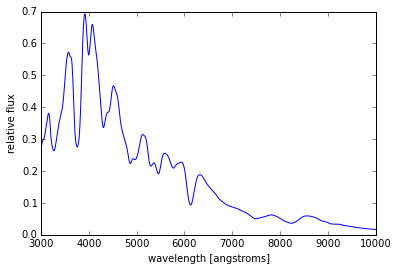

In [3]:
# pick some Delta and phase to plot an example SED
#   currently this is the Hsiao model warped/mangled
#   to match the MLCS2k2 UBVRI model vectors
m.set(delta = -0.04)
phase = [+1.2]

wave = np.linspace(3000., 10000., 3500)
plt.figure()
plt.plot(wave,m.flux(phase,wave).reshape(len(wave)))
plt.xlabel('wavelength [angstroms]')
plt.ylabel('relative flux');

In [4]:
# create a new model including host CCM dust
#   and let's set host R_V = 2.5
dust = sncosmo.CCM89Dust()
model = sncosmo.Model(source='mlcs2k2', effects=[dust],
                     effect_names=['host'], effect_frames=['rest'])
model.set(hostr_v=2.5)
print(model)

source:
  class      : MLCS2k2Source
  name       : 'mlcs2k2'
  version    : 1.0
  phases     : [-20, .., 85] days
  wavelengths: [1000, .., 25000] Angstroms
effect (name='host' frame='rest'):
  class           : CCM89Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z         = 0.0
  t0        = 0.0
  amplitude = 1.0
  delta     = 0.0
  hostebv   = 0.0
  hostr_v   = 2.5


In [5]:
# let's see the peak V magnitude and B-V color
bpeak = model.bandmag('bessellb', 'vega', 0.)
vpeak = model.bandmag('bessellv', 'vega', 0.)
print(vpeak,bpeak-vpeak)

-19.4965019708 -0.0754206319248


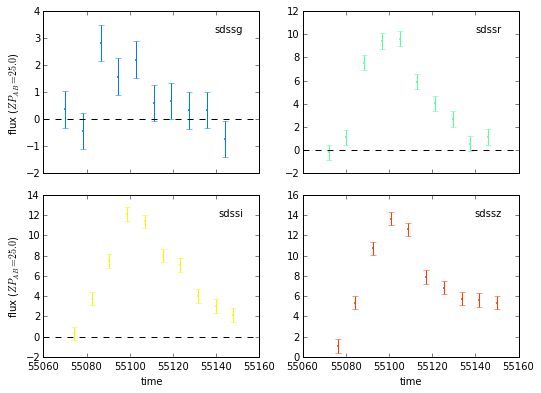

In [6]:
# load some example data and plot it
data = sncosmo.load_example_data()
sncosmo.plot_lc(data);

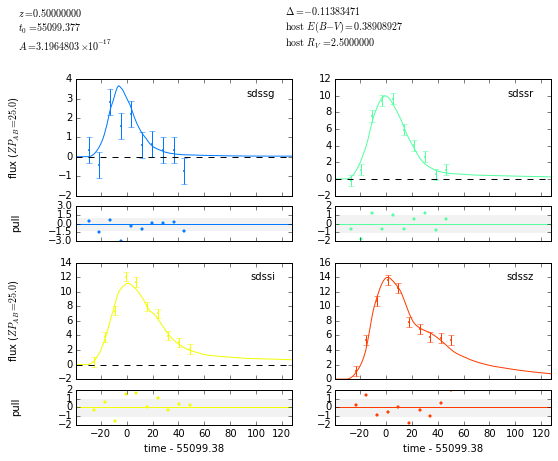

In [7]:
# fit the model (iminuit maximum likelihood) and plot results
model.set(z=0.5)
fitparams = ['t0', 'amplitude', 'delta', 'hostebv']
fitparams_latex = [r"$t_0$", r"$A$", r"$\Delta$", r"host $E(B-V)$"]
res, fitted_model = sncosmo.fit_lc(data, model, fitparams)
sncosmo.plot_lc(data, fitted_model);

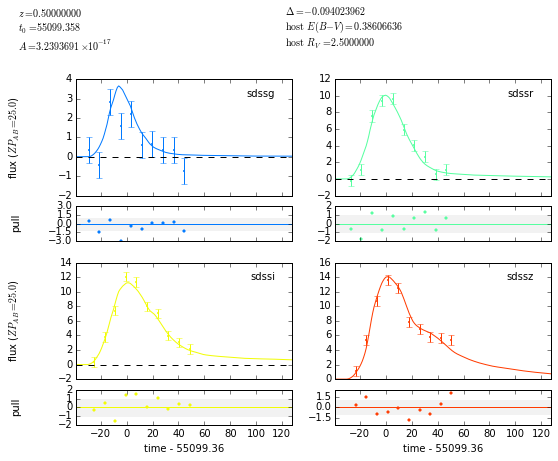

In [8]:
# fit the model with MCMC chains and plot best fit (takes a couple of minutes)
res, fitted_model = sncosmo.mcmc_lc(data, model, fitparams,  nburn=250, nwalkers=20)
sncosmo.plot_lc(data, fitted_model);

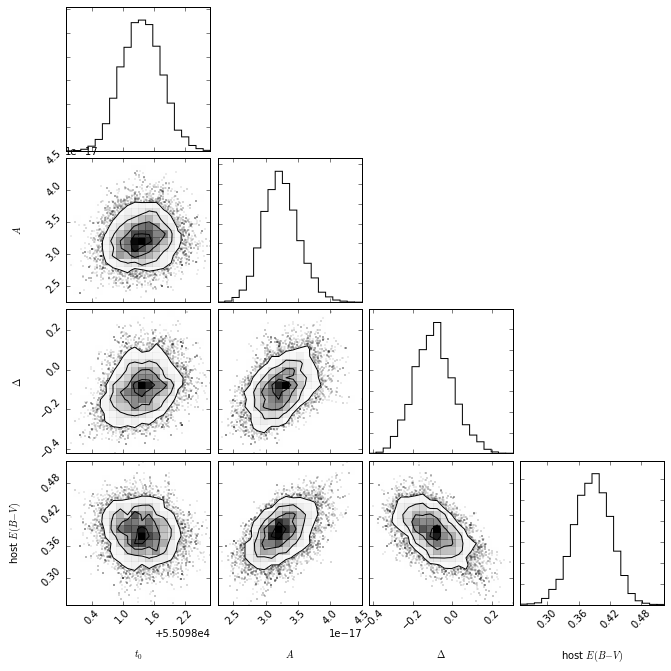

In [9]:
# look at parameter distributions from MCMC
corner.corner(res.samples,labels=fitparams_latex);